Shivam Tyagi

>
**This notebook presents EDA on Amazon products of FY23**

**OBJECTIVE**

>
Best products at good price with discounts

# Data Collection
The first step includes collection of dataset
here i am using a dataset from kaggle of amazon products

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df=pd.read_csv("Amazon-Products.csv",low_memory=False)
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [84]:
#lets check the no of rows and columns in it
df.shape

(551585, 10)

In [85]:
#now we will check for the null values in our dataset
df.isnull().sum()

Unnamed: 0             0
name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [86]:
#lets drop columns with 70% or more missing data

per=70.0
min_value=int(((100-per)/100)*df.shape[1]+1)
mod_df=df.dropna(axis=1,thresh=min_value)


In [87]:
#now we have reduced columns
mod_df.shape


(551585, 10)

In [88]:
#checking columns names
mod_df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

# Cleaning Data

In [89]:
# Here in above code we can see that datatype of our columns actual_price, discount_price, no_of_ratings is object and we need it to be integer.
#converting into integer or float datatype

In [90]:
#removing Rupee sign from our columns
mod_df["discount_price"] = mod_df["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
mod_df["actual_price"] = mod_df["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [91]:
#changing commas to dots and type to float
mod_df["discount_price"]=mod_df["discount_price"].str.replace(',','').astype(float)
mod_df["actual_price"]=mod_df["actual_price"].str.replace(',','').astype(float)

Now some values in ratings columns cannot be represented as numbers.we replace them with 0.0

In [92]:
mod_df["ratings"].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '2.3',
       '1.7', 'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [93]:
#changing digits type to float
mod_df['ratings'] = mod_df['ratings'].replace(['Get','FREE','₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99'], '0.0')
mod_df['ratings'] = mod_df["ratings"].astype(float)
mod_df['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, nan, 4.6, 3.3, 3.4, 3.7, 2.9,
       5. , 4.4, 3.6, 2.7, 4.5, 3. , 3.1, 3.2, 4.8, 4.7, 2.5, 1. , 2.6,
       2.8, 2.3, 1.7, 0. , 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2. , 1.4, 2.1,
       1.2, 1.3, 1.5, 1.1])

now we will convert no_of_ratings columns into a new column where it begins with a digit

In [94]:
mod_df['no_of_ratings'] = mod_df['no_of_ratings'].astype(str)
mod_df['correct_no_of_ratings'] = pd.Series([mod_df['no_of_ratings'][x][0].isdigit() for x in range(len(mod_df['no_of_ratings']))])
mod_df = mod_df[mod_df['correct_no_of_ratings'] == True]
mod_df['correct_no_of_ratings'].value_counts()

True    369558
Name: correct_no_of_ratings, dtype: int64

In [95]:
#changing to float
mod_df["no_of_ratings"]=mod_df["no_of_ratings"].str.replace(',','').astype(float)

In [96]:
mod_df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,True
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,True
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,True
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,True
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,True


In [97]:
missing_ratings=mod_df[mod_df['actual_price'].isnull()]
missing_ratings.head(2)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings
76,76,LG 1.5 Ton 3 Star Hot & Cold DUAL Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51hbo8yQ1E...,https://www.amazon.in/LG-Inverter-Convertible-...,4.0,265.0,NaN,NaN,True
100,100,Hitachi 1.5 Ton 5 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41AY1pk5oR...,https://www.amazon.in/Hitachi-Inverter-Copper-...,3.8,748.0,NaN,NaN,True


In [98]:
#droppig all these null values
df = mod_df.dropna(subset=['actual_price','discount_price'])
df.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,correct_no_of_ratings
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,True
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,True
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,True
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,True
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,True


In [99]:
#extracting manufacturer from name column which will be useful in further analysis
df['manufacturer'] = df['name'].str.split(' ').str[0]
cols = df.columns.tolist()
cols

<ipython-input-99-3273c9c519ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['manufacturer'] = df['name'].str.split(' ').str[0]


['Unnamed: 0',
 'name',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'correct_no_of_ratings',
 'manufacturer']

Now as we can see our data is clean and is ready for further process so

In [100]:
#Here column unnamed can be removed so removing it
cols=df.columns.tolist()
cols

['Unnamed: 0',
 'name',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
 'correct_no_of_ratings',
 'manufacturer']

In [101]:
cols=[
 'name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price']

In [102]:
df=df[cols]
df.head()

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0


In [103]:
#checking manufacturers according to their prices
df[["actual_price","manufacturer"]].groupby("manufacturer").mean().round(2).sort_values(by="actual_price",ascending=False)

,actual_price
manufacturer,
Marutivilla,4.950001e+09
DENON,2.129000e+05
IMALENT,1.900000e+05
XGIMI,1.899077e+05
Mijia,1.849990e+05
...,...
Too,2.000000e+01
"Sprite,",2.000000e+01
Bingo!,1.000000e+01


In [104]:
#getting maximum price
df[df["actual_price"] == df["actual_price"].max()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",Marutivilla,home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09


now for minimum price row we have to first calculate the discount value

In [105]:
df['discount_value']=df['actual_price']-df['discount_price']
df['discounting_percent'] = 1 - df['discount_price']/df['actual_price']

In [106]:
#getting minimum price row
df[df["discount_value"] == df["discount_value"].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
436321,Mochi Women Gold Synthetic Sandals (44-9937MY),Mochi,women's shoes,Shoes,https://m.media-amazon.com/images/I/71OTpX0i59...,https://www.amazon.in/Mochi-Womens-Fashion-San...,3.6,28.0,1889.99,1890.0,0.01,0.000005
499918,GKFML Fiber Glass 30 METRE FIBER PLASTIKA MEAS...,GKFML,industrial supplies,"Test, Measure & Inspect",https://m.media-amazon.com/images/I/41kdufmMNA...,https://www.amazon.in/GKFML-Fiber-Glass-PLASTI...,3.3,8.0,589.99,590.0,0.01,0.000017


In [107]:
#lets find out our common manufacturer
values=df["manufacturer"].value_counts().keys().tolist()[:10]
counts=df["manufacturer"].value_counts().tolist()[:10]

Plotting our first graph for the above values(Data visualization)

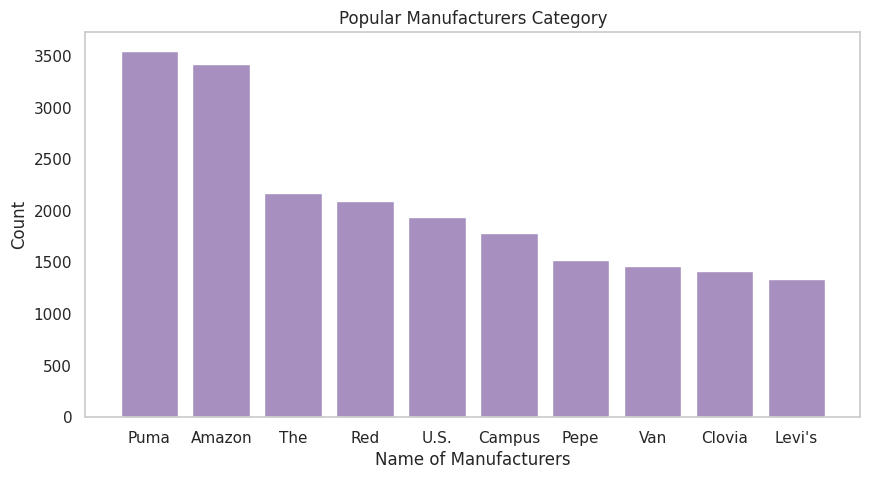

In [150]:
#Here I am ploting a bargraph using Matplotlib
#A bar plot or bar chart is a graph that represents the category of data with rectangular bars.
#This chart describes the comparisons between the discrete categories(popular Manufacturers Category)
fig=plt.figure(figsize=(10,5))
plt.bar(values,counts,color="#4177")
plt.xlabel("Name of Manufacturers")
plt.ylabel("Count")
plt.grid(False)
plt.title("Popular Manufacturers Category")
plt.show()


✅**Insight 1**
Puma is the most poupular from above graph.

Now lets check the main category for above top 10 brands



In [110]:
#creating the dataframe of top 10 manufacturer
df_list=[]
for i in values:
  x=df[df["manufacturer"]==i]
  df_list.append(x)
frame=pd.concat(df_list)
frame.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
21275,Puma polyester 23 Cms Gym Bag(7572229_Pink_X_Red),Puma,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PUMA-Polyester-Bridal-Ro...,4.1,249.0,789.0,1499.0,710.0,0.473649
21776,Puma Women's Boyfriend Leggings,Puma,sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/41SJp8rVXL...,https://www.amazon.in/Puma-Womens-Boyfriend-Le...,4.4,12.0,566.0,1999.0,1433.0,0.716858


In [112]:
#checking the ratings of these manufacturers
values1=frame["manufacturer"].value_counts().keys().tolist()[:10]
counts1=frame["ratings"].value_counts().keys().tolist()[:10]

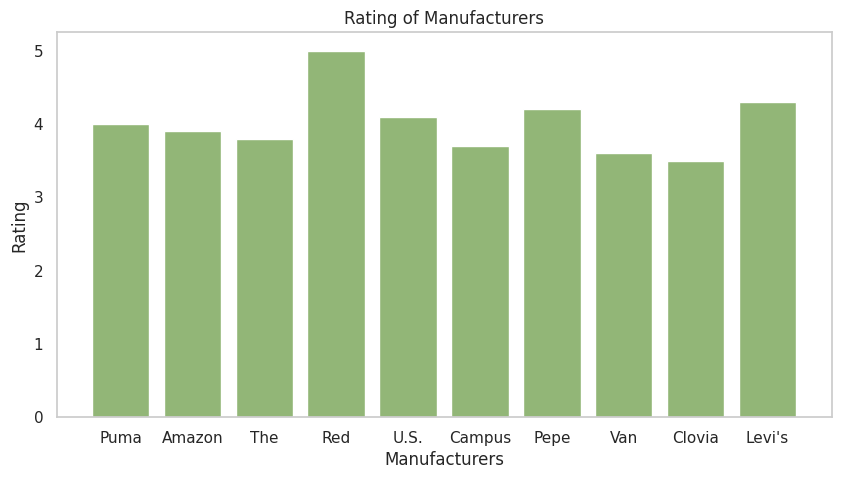

In [151]:
fig=plt.figure(figsize=(10,5))
plt.bar(values1,counts1,color="#3708")
plt.xlabel("Manufacturers")
plt.ylabel("Rating")
plt.grid(False)
plt.title("Rating of Manufacturers")
plt.show()

✅ **Insight 2**

>from the above graph we concluded that the most famous product in FY23 was of Puma but the company Red had the highest rating

✅**Insight 3**

>Now we will check popular main category Items present



In [114]:
#Diferrent main categories present which will be used in our Insight 2
frame["main_category"].unique()

array(['sports & fitness', 'stores', "kids' fashion", 'bags & luggage',
       'accessories', 'car & motorbike', "men's shoes",
       "women's clothing", "women's shoes", "men's clothing",
       'appliances', 'tv, audio & cameras', 'grocery & gourmet foods',
       'home & kitchen', 'pet supplies', 'toys & baby products',
       'beauty & health', 'industrial supplies', 'music'], dtype=object)

In [115]:
values3=frame["main_category"].value_counts().keys().tolist()
counts3=frame["main_category"].value_counts().tolist()

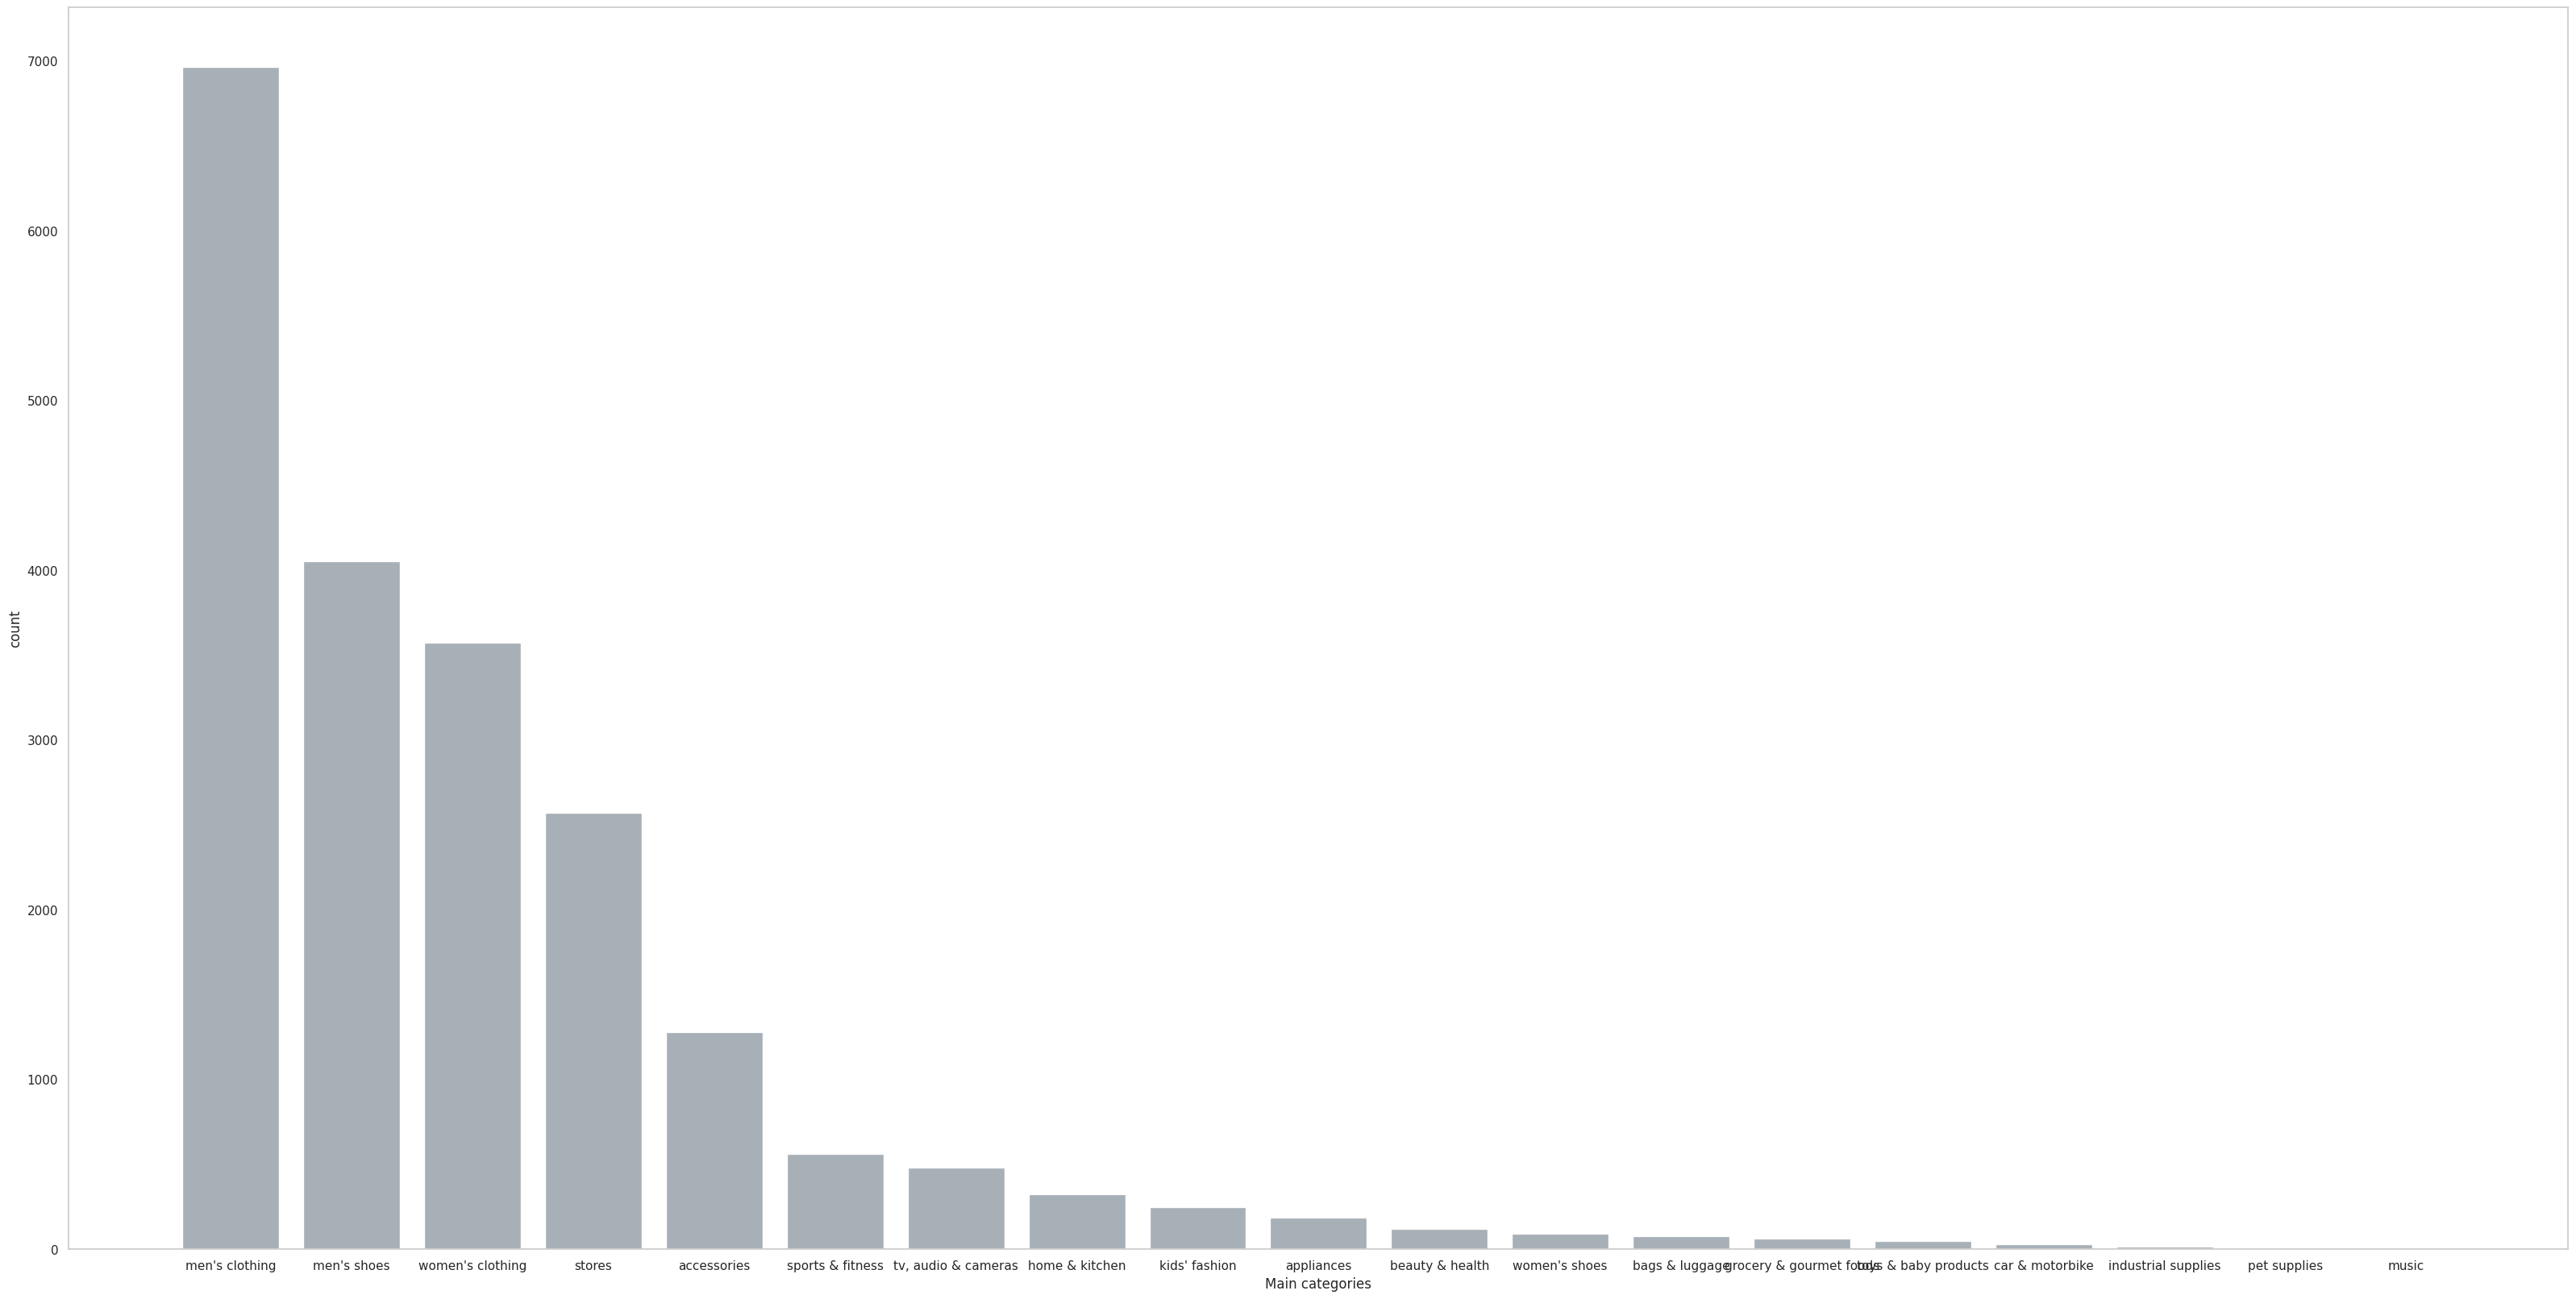

In [152]:
fig=plt.figure(figsize=(40,20))
plt.bar(values3,counts3,color="#4567")
plt.xlabel("Main categories")
plt.ylabel("count")
plt.grid(False)
plt.show()

From the above graph we conclude that 'men's clothing' is the most popular main category

In [128]:
# Let us select the 2 popular main categories

value_main = frame["main_category"].value_counts().keys().tolist()[:5]
count_main = frame["main_category"].value_counts().tolist()[:5]
value_main

["men's clothing", "men's shoes", "women's clothing", 'stores', 'accessories']

Let us create a new dataframe having top 10 popular manufcturers and 5 most popular main category

In [129]:
df_list = []
for i in value_main:
    x = frame[frame["main_category"] == i]
    df_list.append(x)
    #print(df)
frame = pd.concat(df_list)
frame.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
272427,Puma Men's Regular Fit Vest,Puma,men's clothing,Innerwear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/PUMA-Solid-Regular-67459...,4.4,5.0,559.0,799.0,240.0,0.300375
272574,Puma Men's Boxer Shorts (58672906_Blue_XL),Puma,men's clothing,Innerwear,https://m.media-amazon.com/images/I/51MjTF8Oxh...,https://www.amazon.in/Puma-Regular-Polyester-U...,4.6,20.0,809.0,1799.0,990.0,0.550306


In [130]:
# Let us check the popular subcategory
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
frame_sub = frame[["main_category", "sub_category"]].groupby("main_category").count()
frame_sub.style.background_gradient(cmap=cm)

,sub_category
main_category,
accessories,1279
men's clothing,6965
men's shoes,4054
stores,2571
women's clothing,3572


In [131]:
value_sub = frame["sub_category"].value_counts().keys().tolist()[:10]
count_sub = frame["sub_category"].value_counts().tolist()[:10]

In [132]:
# New dataframe with selected sub_category
df_list = []
for i in value_sub:
    x = frame[frame["sub_category"] == i]
    df_list.append(x)
frame = pd.concat(df_list)
frame.head(2)

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent
479282,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/51C6al84h8...,https://www.amazon.in/Solid-Regular-T-Shirt-84...,3.3,14.0,709.0,1499.0,790.0,0.527018
479316,Puma Men's Regular Fit T-Shirt,Puma,men's clothing,T-shirts & Polos,https://m.media-amazon.com/images/I/51poZAKqXo...,https://www.amazon.in/Puma-Solid-Regular-T-Shi...,3.8,12.0,689.0,1499.0,810.0,0.540360


now after all these steps what we have achieved is-:

> No null values

> Top 10 manufacturers with respect to count

> Most popular Manufacturer

> Most rated Manufacturer

> Popular main_categories and sub_categories



**Price Data Distribution**

* Now lets plot the price data of the column actual_price
* Here we will use the box plot and will also find the outliers
    >Outlier is an observation that lies on abnormal distance from other values in a random sample from a population









In [133]:
frame.actual_price.describe()

count    15635.000000
mean      2768.294212
std       2022.684725
min        215.000000
25%       1399.000000
50%       2199.000000
75%       3599.000000
max      25062.000000
Name: actual_price, dtype: float64

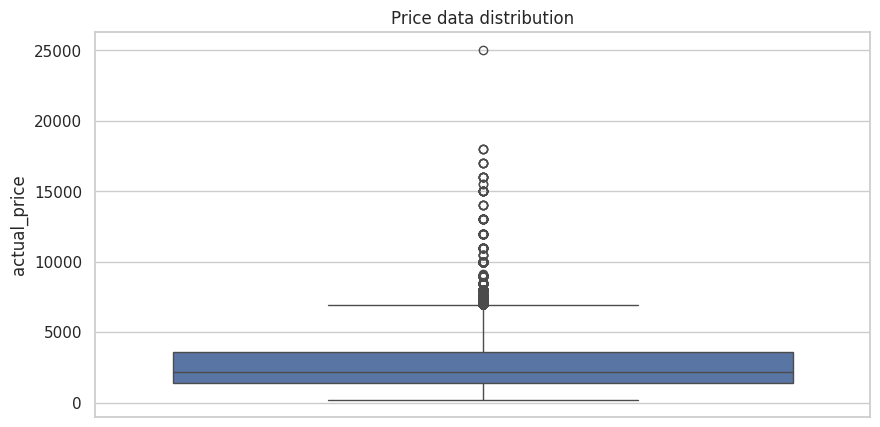

In [134]:
#Here we will plot the Box plot
# A box and whisker plot or diagram (otherwise known as a boxplot),
# is a graph summarising a set of data. The shape of the boxplot shows how the data is distributed.
# it also shows any outliers. It is a useful way to compare different sets of data as you can draw more than one boxplot per graph
import seaborn as sns
fig=plt.figure(figsize=(10,5))
plt.title("Price data distribution")
sns.boxplot(frame['actual_price'])
plt.show()

Now lets find the outliers


In [135]:
Q1 = 1399
Q2 = 2199
Q3 = 3599
IQR = Q3 - Q1
outlier1 = (Q1 - 1.5 * IQR)
outlier2 = (Q3 + 1.5 * IQR)
print("outlier1: ", outlier1)
print("outlier2: ", outlier2)

outlier1:  -1901.0
outlier2:  6899.0


In [136]:
outlier_price = []

for i in frame.actual_price:
    if i < outlier1 or i > outlier2:
        outlier_price.append("outlier")
    elif i > outlier1 or i < outlier2:
        outlier_price.append("normal")

frame["outlier_price"] = outlier_price

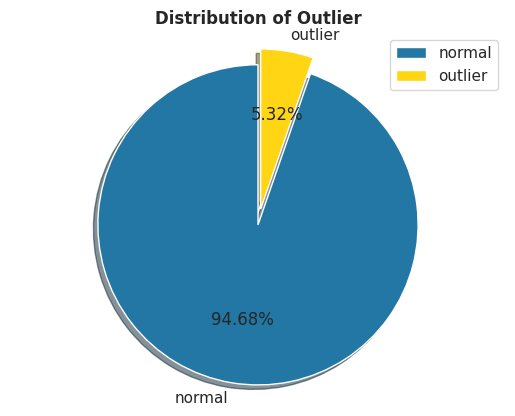

In [137]:
#plotting a pie chart showing the outliers and normal data in our actual_price column
#A pie chart is a circular statistical graphic that is divided into slices to illustrate numerical proportions.

labels = frame["outlier_price"].value_counts().index #it will count the values
sizes = frame["outlier_price"].value_counts().values #it will count the percent of the values
colors = {'normal': '#2377a4', 'outlier': '#ffd514'}

fig, ax = plt.subplots()
explode=[0.0,0.1]
ax.pie(sizes, labels=labels, autopct='%.2f%%',explode=explode, startangle=90, colors=[colors[label] for label in labels],shadow=True,)
ax.axis('equal')
plt.legend(labels)
plt.title("Distribution of Outlier", fontweight='bold')
plt.show()

 Now we can easily convert this pie chart to a Doughnut chart by using 'Wedge props' in our normal pie chart
 doughnut chart is the one which has a opening at the center

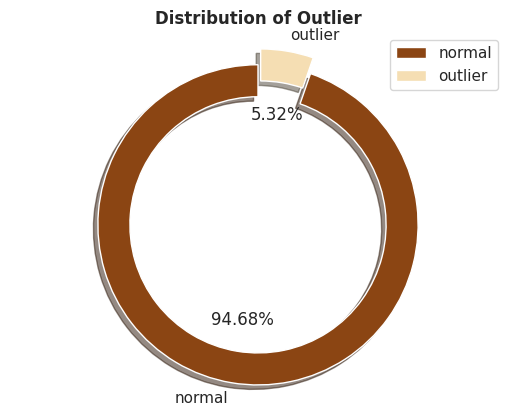

In [138]:
labels = frame["outlier_price"].value_counts().index #it will count the values
sizes = frame["outlier_price"].value_counts().values #it will count the percent of the values
colors = {'normal': 'saddlebrown', 'outlier': 'wheat'}

fig, ax = plt.subplots()
explode=[0.0,0.1]
ax.pie(sizes, labels=labels, autopct='%.2f%%',explode=explode, startangle=90, colors=[colors[label] for label in labels],shadow=True,wedgeprops={'width':0.2})
ax.axis('equal')
plt.legend(labels)
plt.title("Distribution of Outlier", fontweight='bold')
plt.show()

let us now see the outlier price

In [139]:
#finding the outlier price
frame_outlier=frame.loc[frame['outlier_price']=='outlier'].head()
frame_outlier

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discounting_percent,outlier_price
448784,Puma Unisex-Adult Aviator Profoam Sky Running ...,Puma,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/71eG0wSM4J...,https://www.amazon.in/Puma-Unisex-Adult-Aviato...,4.0,20.0,3329.0,7999.0,4670.0,0.583823,outlier
448815,Puma Unisex-Adult X-ray 2 Square White-Gray Vi...,Puma,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Puma-Unisex-Adult-Black-...,3.2,10.0,3499.0,6999.0,3500.0,0.500071,outlier
449223,Puma Unisex-Adult Softride Premier One8 Walkin...,Puma,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/71BXhYwnqT...,https://www.amazon.in/Puma-Softride-Premier-Wa...,3.7,22.0,3374.0,7499.0,4125.0,0.550073,outlier
449341,Puma Unisex-Adult Electrify Nitro Turn One8 Ru...,Puma,men's shoes,Sports Shoes,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Electrify-Nitro-Adults-U...,3.9,33.0,4499.0,9999.0,5500.0,0.550055,outlier
449452,Puma Mens Bowling 22.1 Cricket Shoe,Puma,men's shoes,Sports Shoes,https://m.media-amazon.com/images/I/61qq7i+gDi...,https://www.amazon.in/Puma-Bowling-Bluemazing-...,5.0,5.0,8399.0,13999.0,5600.0,0.400029,outlier


In [140]:
print("Manufacturers with outlier price: ", frame_outlier.manufacturer.value_counts())

Manufacturers with outlier price:  Puma    5
Name: manufacturer, dtype: int64


In [141]:
# Top category
print("Main category with outliers: ", frame_outlier.main_category.value_counts())

Main category with outliers:  men's shoes    5
Name: main_category, dtype: int64


In [142]:
#sub_category
print("Sub_category with outliers: ",frame_outlier.sub_category.value_counts())

Sub_category with outliers:  Sports Shoes    5
Name: sub_category, dtype: int64


Violin plot

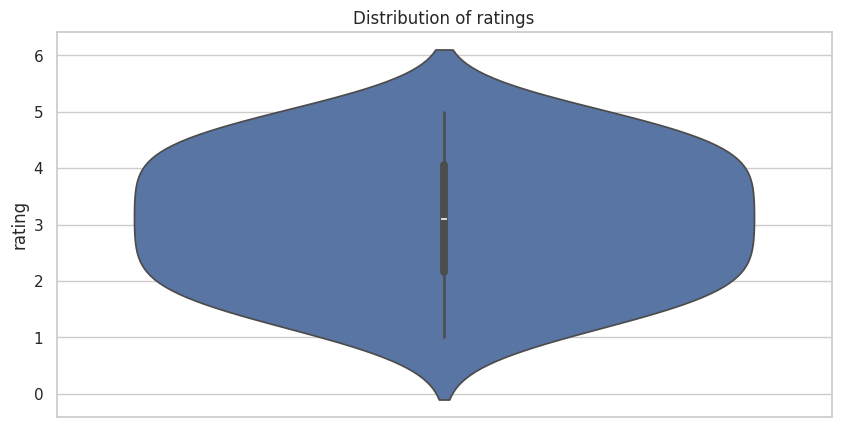

In [143]:
fig=plt.figure(figsize=(10,5))
sns.set(style = 'whitegrid')
sns.violinplot(data=frame['ratings'].value_counts().index)
plt.ylabel("rating")
plt.title("Distribution of ratings")
plt.show()

✅Insight 4

>As we can see the selected category of products have most common rating between 3 and 4



**Relation between no of reviews and Discounting percent**

> Now I am showing the relation using scatter plot

> Scatter plot uses dots to represent values for two different numeric variables. The position of each dot on the horizontal and vertical axis indicates values for an individual data point.





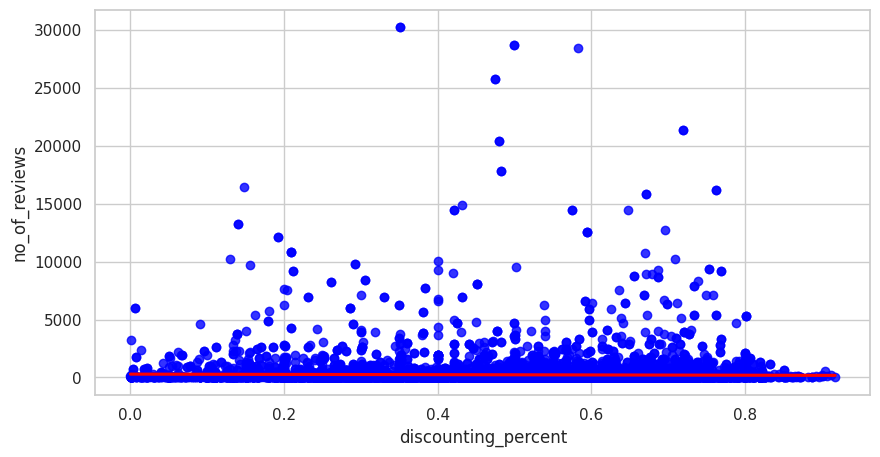

In [144]:
fig=plt.figure(figsize=(10,5))
sns.regplot(x="discounting_percent", y="no_of_ratings", data=frame, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("no_of_reviews")
plt.show()

✅**Insight 5**


> We can see OLS trendline of slightly decreasing number of reviews with increasing of discount percent.



**Plotting discount_value using a KDE plot**


> KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable


<ipython-input-145-974e3ffed094>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=frame["discount_value"],label="Discount_percent",shade=True)


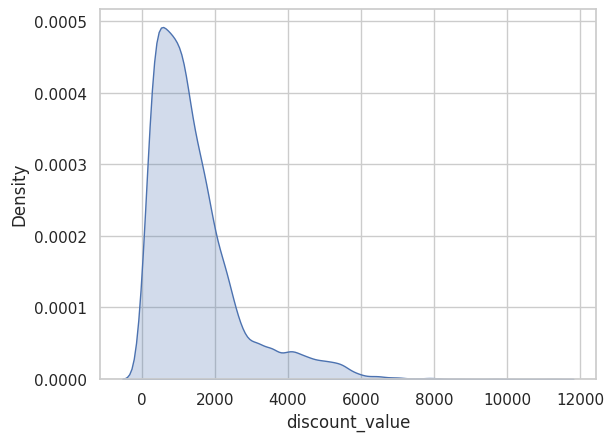

In [145]:
#kDE plot for discount_percent
sns.kdeplot(data=frame["discount_value"],label="Discount_percent",shade=True)
plt.show()

Above we plotted the discount_value now let's represent the columns like ratings, no_of_ratings,discount value

**A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column**

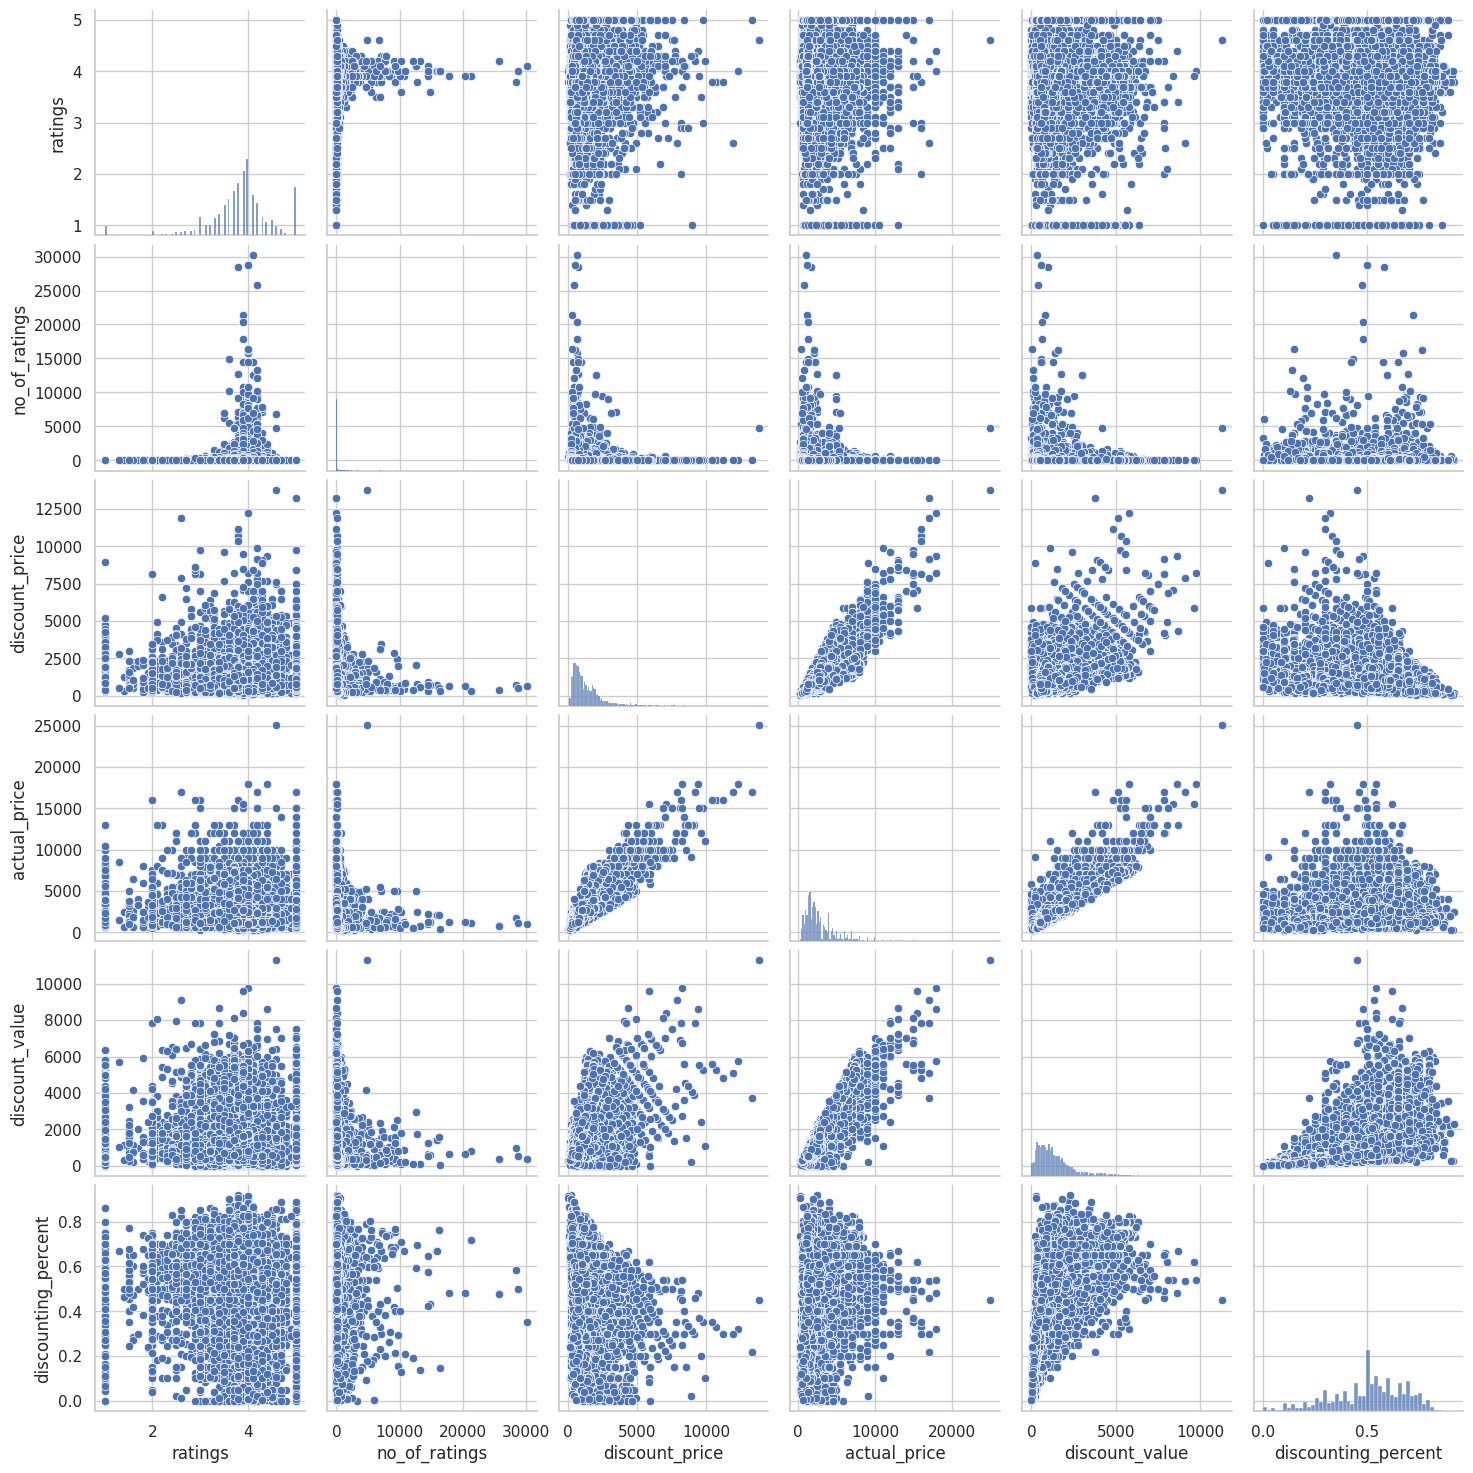

In [146]:
#using a pairplot
sns.pairplot(frame)
plt.show()

Finally creating Histogram for our discounting_price

> **A histogram is a graphical representation of data points organized into user-specified ranges. Similar in appearance to a bar graph, the histogram condenses a data series into an easily interpreted visual by taking many data points and grouping them into logical ranges or bins**.

* The sns.histplot() function is used to create the histogram.
* data=df specifies the DataFrame and x="Value" specifies the column to use for the histogram.
* bins=10 determines the number of bins (bars) in the histogram.
* kde=True adds a kernel density estimate (smooth curve) to the histogram.
* color="skyblue" sets the color of the bars.
  




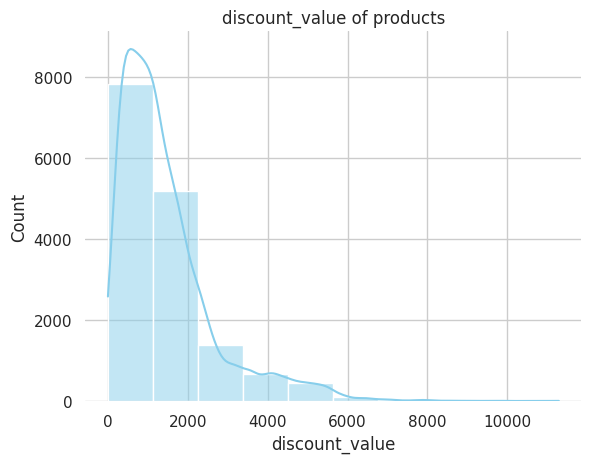

In [147]:
sns.set_style("whitegrid")
sns.histplot(data=frame,x='discount_value',bins=10,kde=True,color="skyblue")
sns.despine(left=True, bottom=True)
plt.title("discount_value of products")
plt.show()

⭐ **Conclusion**

1. The products with price less than ₹3600 are popular.
2. The outlier in price data are around 5.32%
3. Puma and Red are the most popular manufactures with outlier price
4. The maximum number rating of popular brands is in range of 4 star
5. Mostly 0-49 review were given on the products
6. Every product has a review in selected dataframe  






